## Read seaborn Titanic dataset

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns

#data = pd.read_csv('/content/Titanic.csv')
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Identify columns with null values

In [84]:
data.isnull().sum()


,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


## Finding the distinct values in column age  

In [85]:
data['age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

## Fill null values in Age columm with mean age

In [86]:
data['age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [87]:
data['age'].mean()

np.float64(29.69911764705882)

In [88]:
data['age'].mode()[0]

np.float64(24.0)

In [89]:
# fill missing values with mean
# data['age'] = pd.to_numeric(data['age'],errors='coerce')
# data['age'].fillna(data['age'].mean(),inplace=True)

# # fill missing values with mode
# #data['age'].fillna(data['age'].mode()[0],inplace=True)


#Use KNN imputer to fill mean of nearest neighbours for missing values

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
data['age'] = imputer.fit_transform(data[['age']])

data['age'].unique()

array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

In [90]:
data.isna().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


## Fill null values in 'embarked' column with most frequently occuring category (mode)

In [91]:
data['embarked'].fillna(data['embarked'].mode()[0],inplace=True)
print(data['embarked'].unique())

['S' 'C' 'Q']


<ipython-input-91-9c8f2003f120>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['embarked'].fillna(data['embarked'].mode()[0],inplace=True)


## Fill null values in deck column

In [92]:
data['deck'].fillna(data['deck'].mode()[0],inplace=True)
data['deck'].value_counts()

<ipython-input-92-aea90a9449f9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['deck'].fillna(data['deck'].mode()[0],inplace=True)


,count
deck,
C,747
B,47
D,33
E,32
A,15
F,13
G,4


### Feature Engineering

## Add a column to check if kid or not

In [93]:
data['is_kid'] = np.where(data['age'] <= 18.0, 1, 0)
data['is_adult']  = np.where(data['age'] > 18.0, 1, 0)

In [94]:
 (data['age']<18.0).sum()

np.int64(113)

## Create categorical columns for distinct values in embarked to have numerical columns

In [95]:
Cherbourg = []
Queenstown = []
Southampton = []
for i in data['embarked']:
   if i == 'S':
      Southampton.append(1)
      Queenstown.append(0)
      Cherbourg.append(0)
   if i  == 'Q':
      Queenstown.append(1)
      Southampton.append(0)
      Cherbourg.append(0)
   if i  == 'C':
      Cherbourg.append(1)
      Queenstown.append(0)
      Southampton.append(0)

data['Embarked_Southampton'] = Southampton
data['Embarked_Cherbourg'] = Cherbourg
data['Embarked_Queenstown'] = Queenstown

## Check if survived and alive columns have same data, so can drop one of them

In [96]:
data['survived'].value_counts()

,count
survived,
0,549
1,342


In [97]:
data['survived'].nunique()

2

In [98]:
data['alive'].value_counts()

,count
alive,
no,549
yes,342


# This says same rows in survived and alive columns.Hence any one can be deleted

In [99]:
cnt_no = 0
cnt_yes = 0
for i,j in zip(data['survived'], data['alive']):
        if i == 0 and j == 'no':
          cnt_no +=1
        elif i == 1 and j == 'yes':
           cnt_yes +=1

print('no:',cnt_no,'yes:', cnt_yes)

no: 549 yes: 342


In [100]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,is_kid,is_adult,Embarked_Southampton,Embarked_Cherbourg,Embarked_Queenstown
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,0,1,1,0,0
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0,1,0,1,0
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,0,1,1,0,0
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0,1,1,0,0
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,C,Southampton,no,True,0,1,1,0,0
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0,1,1,0,0
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False,0,1,1,0,0
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0,1,0,1,0


## Create categorical columns for sex

In [101]:
data['sex'].unique()

array(['male', 'female'], dtype=object)

In [102]:
sex_female = []
sex_male = []
for i in data['sex']:
  if i == 'female':
      sex_female.append(1)
      sex_male.append(0)
  if i == 'male':
      sex_female.append(0)
      sex_male.append(1)
data['Sex_Female'] = sex_female
data['Sex_male'] = sex_male

In [103]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,embark_town,alive,alone,is_kid,is_adult,Embarked_Southampton,Embarked_Cherbourg,Embarked_Queenstown,Sex_Female,Sex_male
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,...,Southampton,no,False,0,1,1,0,0,0,1
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,...,Cherbourg,yes,False,0,1,0,1,0,1,0
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,...,Southampton,yes,True,0,1,1,0,0,1,0
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,...,Southampton,yes,False,0,1,1,0,0,1,0
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,...,Southampton,no,True,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,...,Southampton,no,True,0,1,1,0,0,0,1
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,...,Southampton,yes,True,0,1,1,0,0,1,0
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,...,Southampton,no,False,0,1,1,0,0,1,0
889,1,1,male,26.000000,0,0,30.0000,C,First,man,...,Cherbourg,yes,True,0,1,0,1,0,0,1


## Convert deck column into numeric

In [104]:
data['deck']= np.where(data['deck']=='A',1,np.where(data['deck']=='B',2,np.where(data['deck']=='C',3,np.where(data['deck']=='D',4,np.where(data['deck']=='E',5,np.where(data['deck']=='F',6,np.where(data['deck']=='G',7,data['deck'])))))))

In [105]:
data['deck'].value_counts()

,count
deck,
3,747
2,47
4,33
5,32
1,15
6,13
7,4


# Create new column to get total number of family members

In [106]:
data['Total_family_members'] = data['sibsp'] + data['parch'] + 1

## Identify and drop unnecessary columns

In [107]:
data = data.drop(columns=['alive','embarked','who','sex','class','embark_town','sibsp','parch'])

In [108]:
data

,survived,pclass,age,fare,adult_male,deck,alone,is_kid,is_adult,Embarked_Southampton,Embarked_Cherbourg,Embarked_Queenstown,Sex_Female,Sex_male,Total_family_members
0,0,3,22.000000,7.2500,True,3,False,0,1,1,0,0,0,1,2
1,1,1,38.000000,71.2833,False,3,False,0,1,0,1,0,1,0,2
2,1,3,26.000000,7.9250,False,3,True,0,1,1,0,0,1,0,1
3,1,1,35.000000,53.1000,False,3,False,0,1,1,0,0,1,0,2
4,0,3,35.000000,8.0500,True,3,True,0,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,13.0000,True,3,True,0,1,1,0,0,0,1,1
887,1,1,19.000000,30.0000,False,2,True,0,1,1,0,0,1,0,1
888,0,3,29.699118,23.4500,False,3,False,0,1,1,0,0,1,0,4
889,1,1,26.000000,30.0000,True,3,True,0,1,0,1,0,0,1,1


## Convert alone and adult_male columns to numeric

In [109]:
data['alone'] = data['alone'].astype('int')
data['adult_male'] = data['adult_male'].astype('int')



In [110]:
data

,survived,pclass,age,fare,adult_male,deck,alone,is_kid,is_adult,Embarked_Southampton,Embarked_Cherbourg,Embarked_Queenstown,Sex_Female,Sex_male,Total_family_members
0,0,3,22.000000,7.2500,1,3,0,0,1,1,0,0,0,1,2
1,1,1,38.000000,71.2833,0,3,0,0,1,0,1,0,1,0,2
2,1,3,26.000000,7.9250,0,3,1,0,1,1,0,0,1,0,1
3,1,1,35.000000,53.1000,0,3,0,0,1,1,0,0,1,0,2
4,0,3,35.000000,8.0500,1,3,1,0,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,13.0000,1,3,1,0,1,1,0,0,0,1,1
887,1,1,19.000000,30.0000,0,2,1,0,1,1,0,0,1,0,1
888,0,3,29.699118,23.4500,0,3,0,0,1,1,0,0,1,0,4
889,1,1,26.000000,30.0000,1,3,1,0,1,0,1,0,0,1,1


# Now, we have all columns converted to numeric, convert them all to float and then normalise

In [111]:
for column in data.columns:
    data[column] = data[column].astype(float).round(2)

In [112]:
data['fare'] = data['fare'].astype(float).round(2)

In [113]:
data

,survived,pclass,age,fare,adult_male,deck,alone,is_kid,is_adult,Embarked_Southampton,Embarked_Cherbourg,Embarked_Queenstown,Sex_Female,Sex_male,Total_family_members
0,0.0,3.0,22.0,7.25,1.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0
1,1.0,1.0,38.0,71.28,0.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0
2,1.0,3.0,26.0,7.92,0.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
3,1.0,1.0,35.0,53.10,0.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0
4,0.0,3.0,35.0,8.05,1.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,27.0,13.00,1.0,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
887,1.0,1.0,19.0,30.00,0.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
888,0.0,3.0,29.7,23.45,0.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,4.0
889,1.0,1.0,26.0,30.00,1.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0


## Normalisation using MinMaxScaler

In [114]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_data = scaler.fit_transform(data)
data = pd.DataFrame(normalised_data,columns=data.columns)
data

,survived,pclass,age,fare,adult_male,deck,alone,is_kid,is_adult,Embarked_Southampton,Embarked_Cherbourg,Embarked_Queenstown,Sex_Female,Sex_male,Total_family_members
0,0.0,1.0,0.271174,0.014151,1.0,0.333333,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.1
1,1.0,0.0,0.472229,0.139129,0.0,0.333333,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.1
2,1.0,1.0,0.321438,0.015459,0.0,0.333333,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.434531,0.103644,0.0,0.333333,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.1
4,0.0,1.0,0.434531,0.015713,1.0,0.333333,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.5,0.334004,0.025374,1.0,0.333333,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
887,1.0,0.0,0.233476,0.058556,0.0,0.166667,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
888,0.0,1.0,0.367932,0.045771,0.0,0.333333,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.3
889,1.0,0.0,0.321438,0.058556,1.0,0.333333,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


## with standard scaler normalisation

In [32]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# normalized_data = scaler.fit_transform(data)
# data = pd.DataFrame(normalized_data,columns=data.columns)
# data

,survived,pclass,age,fare,adult_male,deck,alone,is_kid,is_adult,Embarked_Southampton,Embarked_Cherbourg,Embarked_Queenstown,Sex_Female,Sex_male,Total_family_members
0,-0.789272,0.827377,-0.592494,-0.502449,0.811922,-0.119419,-1.231645,-0.429931,0.429931,0.615838,-0.482043,-0.307562,-0.737695,0.737695,0.059160
1,1.266990,-1.566107,0.638776,0.786776,-1.231645,-0.119419,-1.231645,-0.429931,0.429931,-1.623803,2.074505,-0.307562,1.355574,-1.355574,0.059160
2,1.266990,0.827377,-0.284677,-0.488958,-1.231645,-0.119419,0.811922,-0.429931,0.429931,0.615838,-0.482043,-0.307562,1.355574,-1.355574,-0.560975
3,1.266990,-1.566107,0.407912,0.420727,-1.231645,-0.119419,-1.231645,-0.429931,0.429931,0.615838,-0.482043,-0.307562,1.355574,-1.355574,0.059160
4,-0.789272,0.827377,0.407912,-0.486341,0.811922,-0.119419,0.811922,-0.429931,0.429931,0.615838,-0.482043,-0.307562,-0.737695,0.737695,-0.560975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.789272,-0.369365,-0.207722,-0.386674,0.811922,-0.119419,0.811922,-0.429931,0.429931,0.615838,-0.482043,-0.307562,-0.737695,0.737695,-0.560975
887,1.266990,-1.566107,-0.823357,-0.044384,-1.231645,-1.538119,0.811922,-0.429931,0.429931,0.615838,-0.482043,-0.307562,1.355574,-1.355574,-0.560975
888,-0.789272,0.827377,0.000054,-0.176266,-1.231645,-0.119419,-1.231645,-0.429931,0.429931,0.615838,-0.482043,-0.307562,1.355574,-1.355574,1.299429
889,1.266990,-1.566107,-0.284677,-0.044384,0.811922,-0.119419,0.811922,-0.429931,0.429931,-1.623803,2.074505,-0.307562,-0.737695,0.737695,-0.560975


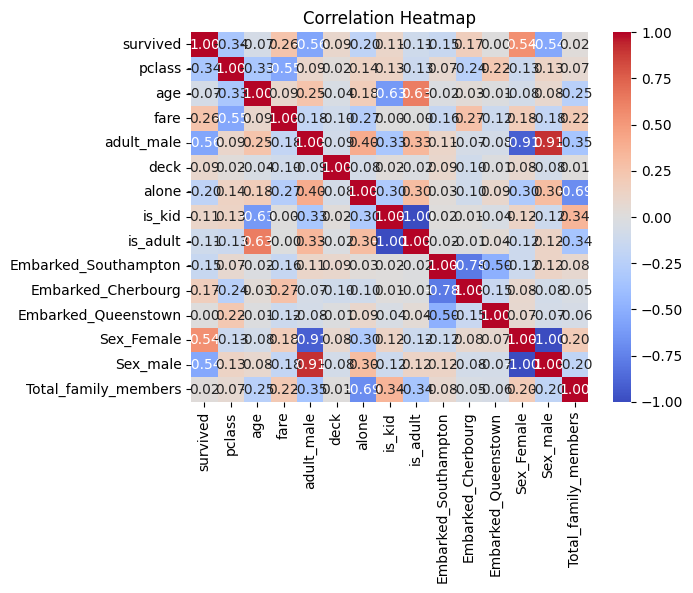

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create the heatmap
#plt.figure(figsize=(12, 10))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [116]:
from sklearn.model_selection import train_test_split

X = data.drop('survived', axis=1)
Y = data['survived']


# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Convert X_train and X_test back to DataFrames if needed
# X_train = pd.DataFrame(X_train, columns=X.columns)
# X_test = pd.DataFrame(X_test, columns=X.columns)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1,random_state=42)

In [117]:
Y_train.value_counts()

,count
survived,
0.0,495
1.0,306


In [118]:
data.shape

(891, 15)

In [119]:
data['survived'].value_counts()

,count
survived,
0.0,549
1.0,342


In [120]:
Y_test.value_counts()

,count
survived,
0.0,54
1.0,36


In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier()
}

# Dictionary to store model accuracies
model_accuracies = {}

# Train and evaluate models
for name, model in models.items():
    # Training
    model.fit(X_train, Y_train)
    Y_pred_train = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_pred_train)

    # Testing
    Y_pred_test = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_pred_test)

    # Store accuracies in the dictionary
    model_accuracies[name] = {'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy}

    print(f'{name}: Train Accuracy = {train_accuracy:.4f}, Test Accuracy = {test_accuracy:.4f}')

Logistic Regression: Train Accuracy = 0.8202, Test Accuracy = 0.8333
Decision Tree: Train Accuracy = 0.9825, Test Accuracy = 0.8333
Random Forest: Train Accuracy = 0.9825, Test Accuracy = 0.8333
SVM: Train Accuracy = 0.8302, Test Accuracy = 0.8333
KNN: Train Accuracy = 0.8627, Test Accuracy = 0.8333
Naive Bayes: Train Accuracy = 0.7953, Test Accuracy = 0.8000
XGBoost: Train Accuracy = 0.9625, Test Accuracy = 0.8333


## 1st time accuracy

In [152]:
accuracy_df = pd.DataFrame.from_dict(model_accuracies, orient='index')
accuracy_df

,Train Accuracy,Test Accuracy
Logistic Regression,0.796348,0.793296
Decision Tree,0.973315,0.776536
Random Forest,0.973315,0.826816
SVM,0.816011,0.793296
KNN,0.866573,0.793296
Naive Bayes,0.797753,0.759777
XGBoost,0.963483,0.821229


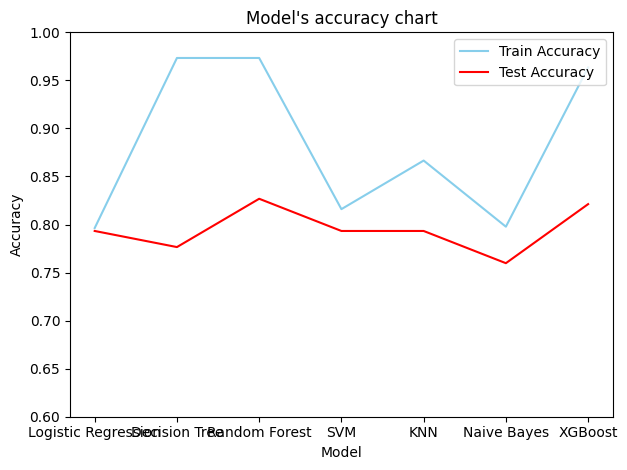

In [153]:
sns.lineplot(x=accuracy_df.index,y=accuracy_df['Train Accuracy'],data=accuracy_df,color="skyblue", label="Train Accuracy")
sns.lineplot(x=accuracy_df.index,y=accuracy_df['Test Accuracy'],data=accuracy_df,color="red", label="Test Accuracy")
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title("Model's accuracy chart")
plt.legend(loc='upper right')
plt.tight_layout()
plt.ylim(0.6,1.0)
plt.show()

## 2nd time accuracy with 'is_kid' column added

In [195]:
accuracy_df1 = pd.DataFrame.from_dict(model_accuracies, orient='index')
accuracy_df1

,Train Accuracy,Test Accuracy
Logistic Regression,0.807584,0.798883
Decision Tree,0.973315,0.776536
Random Forest,0.973315,0.832402
SVM,0.832865,0.798883
KNN,0.865169,0.787709
Naive Bayes,0.797753,0.754190
XGBoost,0.963483,0.821229


## 3rd time accuracy with deck column added/retained

In [241]:
accuracy_df3 = pd.DataFrame.from_dict(model_accuracies, orient='index')
accuracy_df3

,Train Accuracy,Test Accuracy
Logistic Regression,0.807584,0.804469
Decision Tree,0.977528,0.782123
Random Forest,0.977528,0.810056
SVM,0.834270,0.798883
KNN,0.865169,0.810056
Naive Bayes,0.789326,0.759777
XGBoost,0.963483,0.821229


## 4th time accuracy - with is_adult column added

In [383]:
accuracy_df4 = pd.DataFrame.from_dict(model_accuracies, orient='index')
accuracy_df4

,Train Accuracy,Test Accuracy
Logistic Regression,0.831461,0.815642
Decision Tree,0.977528,0.787709
Random Forest,0.977528,0.793296
SVM,0.834270,0.815642
KNN,0.858146,0.815642
Naive Bayes,0.797753,0.776536
XGBoost,0.962079,0.804469


## 5th time accuracy with train - test ratio 70:30 . before it was 80:20


In [390]:
accuracy_df5 = pd.DataFrame.from_dict(model_accuracies, orient='index')
accuracy_df5

,Train Accuracy,Test Accuracy
Logistic Regression,0.825040,0.820896
Decision Tree,0.977528,0.768657
Random Forest,0.977528,0.779851
SVM,0.837881,0.813433
KNN,0.853933,0.805970
Naive Bayes,0.799358,0.776119
XGBoost,0.967897,0.783582


## with mean of age instead of mode

In [435]:
accuracy_df6 = pd.DataFrame.from_dict(model_accuracies, orient='index')
accuracy_df6

,Train Accuracy,Test Accuracy
Logistic Regression,0.823435,0.828358
Decision Tree,0.979133,0.727612
Random Forest,0.979133,0.779851
SVM,0.837881,0.813433
KNN,0.850722,0.809701
Naive Bayes,0.800963,0.776119
XGBoost,0.971108,0.764925


## 7th accuracy with train:test = 90:10

In [438]:
accuracy_df7 = pd.DataFrame.from_dict(model_accuracies, orient='index')
accuracy_df7

,Train Accuracy,Test Accuracy
Logistic Regression,0.820225,0.833333
Decision Tree,0.978777,0.811111
Random Forest,0.978777,0.844444
SVM,0.830212,0.833333
KNN,0.861423,0.822222
Naive Bayes,0.795256,0.800000
XGBoost,0.961298,0.811111


## 8th accuracy - with fare 2 decimals

In [82]:
accuracy_df8 = pd.DataFrame.from_dict(model_accuracies, orient='index')
accuracy_df8

,Train Accuracy,Test Accuracy
Logistic Regression,0.820225,0.833333
Decision Tree,0.982522,0.833333
Random Forest,0.982522,0.833333
SVM,0.830212,0.833333
KNN,0.862672,0.833333
Naive Bayes,0.795256,0.800000
XGBoost,0.962547,0.833333


Accuracy 9 - with age null values filled using KNN imputer

In [122]:
accuracy_df9 = pd.DataFrame.from_dict(model_accuracies, orient='index')
accuracy_df9

,Train Accuracy,Test Accuracy
Logistic Regression,0.820225,0.833333
Decision Tree,0.982522,0.833333
Random Forest,0.982522,0.833333
SVM,0.830212,0.833333
KNN,0.862672,0.833333
Naive Bayes,0.795256,0.800000
XGBoost,0.962547,0.833333
